In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({'x' : [0.9,4.11,4.82,8.53,8.9], 'y' : [1.91,1.84,4.47,6.38,3.92]})

In [ ]:
df

,x,y
0,0.90,1.91
1,4.11,1.84
2,4.82,4.47
3,8.53,6.38
4,8.90,3.92


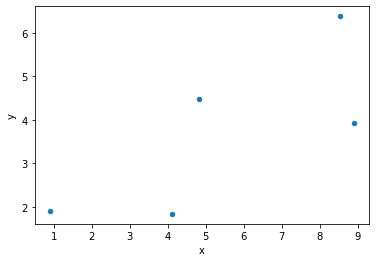

In [ ]:
df.plot(x ='x', y = 'y', kind = 'scatter')

In [ ]:
m,b = 1,1

In [ ]:
df['y_pred'] = df['x'] * m + b

In [ ]:
df

,x,y,y_pred
0,0.90,1.91,1.90
1,4.11,1.84,5.11
2,4.82,4.47,5.82
3,8.53,6.38,9.53
4,8.90,3.92,9.90


In [ ]:
from matplotlib import pyplot as plt

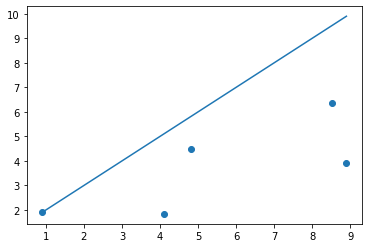

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'],df['y_pred'])

In [ ]:
df['err_abs'] = np.abs(df['y'] - df['y_pred'])
df['err_abs']

0    0.01
1    3.27
2    1.35
3    3.15
4    5.98
Name: err_abs, dtype: float64

In [ ]:
df['err_abs'].mean()

2.7520000000000002

In [ ]:
df['m_change'] = df['x'] * np.sign(df['y'] - df['y_pred'])
df['m_change']

0    0.90
1   -4.11
2   -4.82
3   -8.53
4   -8.90
Name: m_change, dtype: float64

In [ ]:
df['m_change'].mean()

-5.0920000000000005

In [ ]:
df['b_change'] = np.sign(df['y'] - df['y_pred'])
df['b_change']

0    1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
Name: b_change, dtype: float64

In [ ]:
df['b_change'].mean()

-0.6

In [ ]:
nu = 0.1

In [ ]:
m,b

(1, 1)

In [ ]:
m = m + nu *df['m_change'].mean()
b = b + nu * df['b_change'].mean()

In [ ]:
m,b

(0.4907999999999999, 0.94)

In [ ]:
df['y_pred'] = df['x'] * m + b

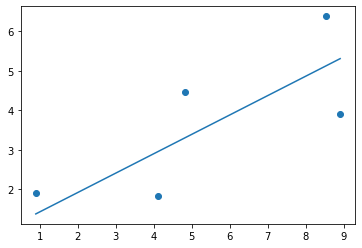

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'],df['y_pred'])

In [ ]:
df['err_abs'] = np.abs(df['y'] - df['y_pred'])
df['err_abs']

0    0.528280
1    1.117188
2    1.164344
3    1.253476
4    1.388120
Name: err_abs, dtype: float64

In [ ]:
df['err_abs'].mean()

1.0902816000000002

In [ ]:
df

,x,y,y_pred,err_abs,m_change,b_change
0,0.90,1.91,1.381720,0.528280,0.90,1.0
1,4.11,1.84,2.957188,1.117188,-4.11,-1.0
2,4.82,4.47,3.305656,1.164344,-4.82,-1.0
3,8.53,6.38,5.126524,1.253476,-8.53,-1.0
4,8.90,3.92,5.308120,1.388120,-8.90,-1.0


In [ ]:
df = df[['x', 'y']].copy()

In [ ]:
df

,x,y
0,0.90,1.91
1,4.11,1.84
2,4.82,4.47
3,8.53,6.38
4,8.90,3.92


In [ ]:
m,b = 1,1

In [ ]:
n = 17

In [ ]:
nu = 0.001

In [ ]:
df['y_pred'] = df['x'] * m + b

In [ ]:
for i in range(n):
  df['m_change'] = df['x'] * np.sign(df['y'] - df['y_pred'])
  df['b_change'] = np.sign(df['y'] - df['y_pred'])
  m = m + nu *df['m_change'].mean()
  b = b + nu * df['b_change'].mean()

  df['y_pred'] = df['x'] * m + b
  df['err_abs'] = np.abs(df['y'] - df['y_pred'])
  df['err_abs'].mean()
  print(df['err_abs'].mean())

0.9798412160000005
0.9797397120000003
0.9796382080000006
0.9795367040000006
0.9794352000000005
0.979438976
0.9794014720000004
0.9794542079999999
0.9794016639999998
0.9794355200000006
0.9794168959999998
0.9794017920000003
0.9794321279999998
0.9793795839999999
0.9794358400000004
0.9793948159999999
0.9794021120000007


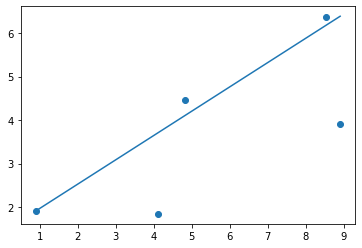

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'],df['y_pred'])

In [ ]:
m,b

(0.5680559999999981, 1.3986000000000003)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 

In [ ]:
df[['x']]

,x
0,0.90
1,4.11
2,4.82
3,8.53
4,8.90


In [ ]:
model.fit(df[['x']], df['y'])

LinearRegression()

In [ ]:
model.coef_

array([0.4327796])

In [ ]:
model.intercept_

1.3444856051457097

In [ ]:
from sklearn.linear_model import SGDRegressor
gd = SGDRegressor()

In [ ]:
gd.fit(df[['x']], df['y'])

SGDRegressor()

In [ ]:
gd.coef_

array([0.51308596])

In [ ]:
gd.intercept_

array([0.72290223])

In [ ]:
df['gd_pred'] = gd.predict(df[['x']])

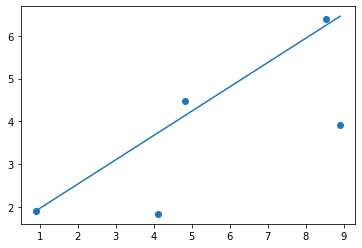

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])

In [ ]:
from sympy import *

In [ ]:
y = Symbol('y', real = True)
x = Symbol('x', real = True)
b = Symbol('b', real = True)
m = Symbol('m', real = True)


In [ ]:
Abs(y - x*m -b)
Abs(b - x*m -y)


Abs(-b + m*x + y)

In [ ]:
diff(Abs(y - x*m - b), m)

x*sign(b + m*x - y)

In [ ]:
sign(0)

0

In [ ]:
diff(Abs(y - x*m - b)**2, m)

2*x*(b + m*x - y)